## Part 2 - Data Cleaning

The original dataset can be found at: https://www.kaggle.com/wenruliu/adult-income-dataset
NOTE: We will be creating a new dataset at the end of this notebook. Please run the notebook to be able to use the next, and last, notebook where we analyse the cleaned dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
import scipy.stats as stat
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
adult = pd.read_csv('adult_original.csv')
adult.head(6)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


### Missing Values

In [4]:
adult.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [5]:
# Let us remove any rows in occupation that have '?' as a value
indexNames = adult[adult['occupation'] == '?'].index
adult.drop(indexNames, inplace = True)
adult.reset_index(drop = True, inplace = True)
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [6]:
# Let us confirm if there are any missing values ('?') any more in the dataset
adult.loc[adult['occupation'].isin(['?'])]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income


In [7]:
adult.loc[adult['workclass'].isin(['?'])]

# All rows with '?' have been removed

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income


In [8]:
# New shape of the dataset
adult.shape
# 15 attributes with 46,033 rows (decreased by approximately 2000 rows)

(46033, 15)

In [9]:
adult.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Missing values removed

We decided to remove or drop the missing values that are labelled with '?'.
Most of these missing values are in workclass and occupation, these two variables are connected and since both are categorical variables it makes it hard to replace, as it might also impact the analysis if it is replaced instead of dropped.

Overall there are approximately 2000 rows that have been dropped which is about 6% of the dataset, this will not have much impact on the analysis due to the huge number of instances.

### Dropping Variables

In [10]:
# Dropping Variabes: fnlwgt, educational-number, capital-gain capital-loss, relationship, native-country
adult.drop(columns = ['fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'relationship', 'native-country'], inplace = True)
adult.head()

,age,workclass,education,marital-status,occupation,race,gender,hours-per-week,income
0,25,Private,11th,Never-married,Machine-op-inspct,Black,Male,40,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,White,Male,50,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,White,Male,40,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Black,Male,40,>50K
4,34,Private,10th,Never-married,Other-service,White,Male,30,<=50K


In [11]:
# New shape of the dataset
adult.shape
# The number of rows has stayed the same but the number of featurees or columns has decreased from 15 to 9.

(46033, 9)

In [12]:
adult.isnull().sum()

age               0
workclass         0
education         0
marital-status    0
occupation        0
race              0
gender            0
hours-per-week    0
income            0
dtype: int64

Dropping variables

In the next step, we decided to also dropped some of the attributes. The dataset contains 15 attrbutes, and we dropped 6 leaving 9 attributes.

Educational-num was dropped because it is the same as the attribute 'education', it is just convertedinto years, so either will be the same. As for relationship, as explained previously, it is a patriarchal dataset, and also it is almost the same as using marital-status, so it has also been dropped.

Similarly native-country has been dropped because the dataset is collected based on the US Census and also contains 
race, we decided to use race as a predictor and dropped native-country, it might not have much of an impact 
for our analysis

Capital gain, capital loss and final weight (fnlwgt) have also been dropped because these features are not useful for our data analysis and also contains "bad" or confusing data that could have an impact on our analysis.

For capital gain and capital loss, the minimum and maximum values are very far from each other 
(shown in data explanatory part I), which makes it very hard to bucktize and also contains many zero values.

Let us look at a few visualizations to understand the distribution of income compared to the numerical variables, age and hours per week

### Visualizations

<AxesSubplot:xlabel='age', ylabel='income'>

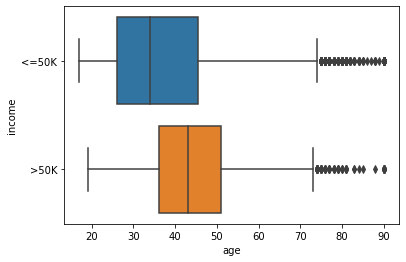

In [13]:
sb.boxplot(x="age",y="income",data=adult)

#### Box plot for Age

It seems that individuals who have an income higher than 50k yearly are in the age range of about 35 to 54, with the 25th Percentile (Q1) at an estimate of 36, median(Q2) at estimate of 44 and 75th Percentile (Q3)

Individuals who have an income less or eqaul to 50k yearly are in range of 24-45, with the mid 20s at 25th Percentile (Q1), median of an estimate of 35 and estimate 45 at 75th Percentile

<AxesSubplot:xlabel='hours-per-week', ylabel='income'>

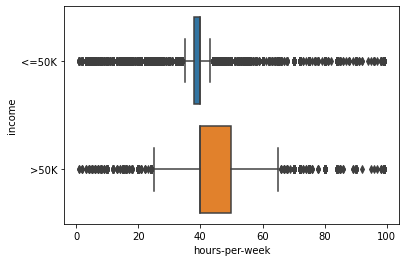

In [14]:
sb.boxplot(x="hours-per-week",y="income",data=adult)

#### Box plot for hour-per-week

As for this plot, it seems a bit hard to estimate the median, but as it shows above, individuals who made more
than 50k yearly, works between an estimate of 40 to 50 hours, while individuals who made less than 50k yearly work between an estimate of 30 and 40 hours. 

In [15]:
education_income = adult.value_counts(subset=['education', 'income'])
education_income = education_income.to_frame('count').reset_index()
education_income

,education,income,count
0,HS-grad,<=50K,12535
1,Some-college,<=50K,8023
2,Bachelors,<=50K,4519
3,Bachelors,>50K,3253
4,HS-grad,>50K,2437
5,Some-college,>50K,2013
6,11th,<=50K,1541
7,Assoc-voc,<=50K,1469
8,Masters,>50K,1430
9,Masters,<=50K,1160


In [16]:
ed = education_income.pivot(index = 'education', columns = 'income')
ed.columns = ['Less than or equal to 50K', 'Greater than 50K']
ed

,Less than or equal to 50K,Greater than 50K
education,,
10th,1156,83
11th,1541,90
12th,553,46
1st-4th,221,8
5th-6th,443,25
7th-8th,786,58
9th,647,40
Assoc-acdm,1125,404
Assoc-voc,1469,509


In [17]:
list(ed.columns.values)

['Less than or equal to 50K', 'Greater than 50K']

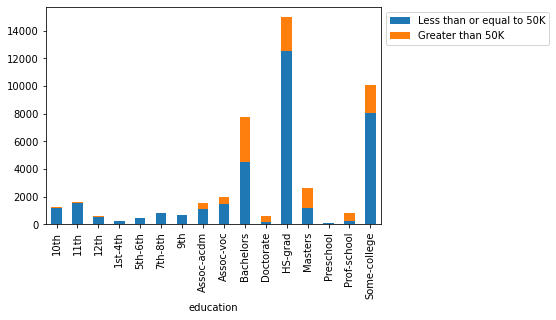

In [18]:
ed[['Less than or equal to 50K', 'Greater than 50K']].plot(kind = 'bar', stacked = True)
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))

This chart shows that most people with any level of education earn less than or equal to $50,000. People with Bachelor's are most likely to have a salary of greater than 50k. There does not appear to be a large correlation with education and income since it does not appear that people are more likely to earn a higher income with better education.

## Label Encoding

In [19]:
y = adult.iloc[:, -1].values.astype(str)
y

array(['<=50K', '<=50K', '>50K', ..., '<=50K', '<=50K', '>50K'],
      dtype='<U5')

In [20]:
from sklearn.preprocessing import LabelEncoder

y_encoder = LabelEncoder()
y = y_encoder.fit_transform(y)
print(y)

# This shows that:
# income of less than or equal to $50K = 0
# income greater than $50K = 1

[0 0 1 ... 0 0 1]


In [21]:
adult['income'] = y
adult['income']

0        0
1        0
2        1
3        1
4        0
5        1
6        0
7        0
8        1
9        0
10       0
11       1
12       1
13       0
14       0
15       0
16       1
17       1
18       0
19       0
20       0
21       1
22       0
23       0
24       0
25       0
26       1
27       0
28       0
29       0
30       0
31       1
32       0
33       0
34       0
35       1
36       1
37       0
38       0
39       0
40       1
41       0
42       0
43       0
44       0
45       0
46       0
47       0
48       1
49       0
50       0
51       0
52       1
53       1
54       0
55       0
56       0
57       0
58       0
59       0
60       0
61       1
62       0
63       0
64       0
65       1
66       0
67       0
68       0
69       0
70       0
71       0
72       0
73       0
74       0
75       0
76       0
77       1
78       0
79       0
80       0
81       1
82       0
83       0
84       0
85       1
86       0
87       0
88       0
89       0
90       0

## ANOVA Results

In [22]:
#Display columns, to see predictors that are used for the analysis
adult.columns

Index(['age', 'workclass', 'education', 'marital-status', 'occupation', 'race',
       'gender', 'hours-per-week', 'income'],
      dtype='object')

In [23]:
grouped_test2=adult[['workclass','income']].groupby(['workclass'])
f_val, p_val = stat.f_oneway(grouped_test2.get_group('Private')['income'],\
                             grouped_test2.get_group('Self-emp-not-inc')['income'],\
                             grouped_test2.get_group('Local-gov')['income'],\
                             grouped_test2.get_group('State-gov')['income'],\
                             grouped_test2.get_group('Self-emp-inc')['income'],\
                             grouped_test2.get_group('Federal-gov')['income'],\
                             grouped_test2.get_group('Without-pay')['income'])  
print( "ANOVA results: F=", f_val, ", P =", p_val)   


ANOVA results: F= 211.56542223429742 , P = 2.341348985856511e-267


In [24]:
#Check all the values in workclass column, to see if all is included for the ANOVA test
adult['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Name: workclass, dtype: int64

#### Interpretation for workclass
The p-value for the workclass shows p = 2.34e-267, which less than significance level of 5%,
(the significance level that will be used for all predictors to compared to the p-value is 5%, since it is the common one
used by many researchers). Since p-value is smaller, it means that this data statistically significant. 
This result is very interesting, it seems that the workclass also impact in income, it is also possible
since people are self-emp or private does not have a fixed income like those who worked for goverments and it also depends on
what position is the individual working for

In [25]:
grouped_test2=adult[['education','income']].groupby(['education'])
f_val, p_val = stat.f_oneway(grouped_test2.get_group('HS-grad')['income'],\
                             grouped_test2.get_group('Some-college')['income'],\
                             grouped_test2.get_group('Bachelors')['income'],\
                             grouped_test2.get_group('Masters')['income'],\
                             grouped_test2.get_group('Assoc-voc')['income'],\
                             grouped_test2.get_group('11th')['income'],\
                             grouped_test2.get_group('7th-8th')['income'],\
                             grouped_test2.get_group('Prof-school')['income'],\
                             grouped_test2.get_group('9th')['income'],\
                             grouped_test2.get_group('12th')['income'],\
                             grouped_test2.get_group('Doctorate')['income'],\
                             grouped_test2.get_group('5th-6th')['income'],\
                             grouped_test2.get_group('1st-4th')['income'],\
                             grouped_test2.get_group('Preschool')['income'])  
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 513.9398551363286 , P = 0.0


In [26]:
#check for values in education, to make sure all is included
adult['education'].value_counts()

HS-grad         14972
Some-college    10036
Bachelors        7772
Masters          2590
Assoc-voc        1978
11th             1631
Assoc-acdm       1529
10th             1239
7th-8th           844
Prof-school       810
9th               687
12th              599
Doctorate         576
5th-6th           468
1st-4th           229
Preschool          73
Name: education, dtype: int64

#### Interpretation for education

The p-value is 0.0 which is less than 0.05 significance level, means that the result is 
statistically significant, which does make sense because with education level, undergraduates are
likely to be paid less than those who held masters and doctorate degree. Level of education can 
impact the income of an individual

In [27]:
grouped_test2=adult[['marital-status','income']].groupby(['marital-status'])
f_val, p_val = stat.f_oneway(grouped_test2.get_group('Married-civ-spouse')['income'],\
                             grouped_test2.get_group('Never-married')['income'],\
                             grouped_test2.get_group('Divorced')['income'],\
                             grouped_test2.get_group('Separated')['income'],\
                             grouped_test2.get_group('Widowed')['income'],\
                             grouped_test2.get_group('Married-spouse-absent')['income'],\
                             grouped_test2.get_group('Married-AF-spouse')['income'])  
print( "ANOVA results: F=", f_val, ", P =", p_val)   


ANOVA results: F= 1932.0587531872698 , P = 0.0


In [28]:
#check for values on column 'marital-status' to make sure all values are included
adult['marital-status'].value_counts()

Married-civ-spouse       21451
Never-married            14875
Divorced                  6363
Separated                 1433
Widowed                   1296
Married-spouse-absent      583
Married-AF-spouse           32
Name: marital-status, dtype: int64

#### Interpretation for Marital-Status

The p-value is 0.0 which is less than the significance level of 0.05, meaning that the result is statistically significant. This result seems very interesting, it is possible that there is a relationship between the two variables, the marital-status can impact income in different ways, since people who are married can also have economic benefits such as living in the same household, acess to health insurances and other shared benefits.

In [29]:
grouped_test2=adult[['occupation','income']].groupby(['occupation'])
f_val, p_val = stat.f_oneway(grouped_test2.get_group('Prof-specialty')['income'],\
                             grouped_test2.get_group('Craft-repair')['income'],\
                             grouped_test2.get_group('Exec-managerial')['income'],\
                             grouped_test2.get_group('Adm-clerical')['income'],\
                             grouped_test2.get_group('Sales')['income'],\
                             grouped_test2.get_group('Other-service')['income'],\
                             grouped_test2.get_group('Machine-op-inspct')['income'],\
                             grouped_test2.get_group('Transport-moving')['income'],\
                             grouped_test2.get_group('Handlers-cleaners')['income'],\
                             grouped_test2.get_group('Farming-fishing')['income'],\
                             grouped_test2.get_group('Tech-support')['income'],\
                             grouped_test2.get_group('Protective-serv')['income'],\
                             grouped_test2.get_group('Priv-house-serv')['income'],\
                             grouped_test2.get_group('Armed-Forces')['income'])  
print( "ANOVA results: F=", f_val, ", P =", p_val)   


ANOVA results: F= 480.551660126308 , P = 0.0


In [30]:
#Check for occupation columns to include all values
adult['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

#### Interpretation for occupation

The p-value is 0.0 which is less than 5% significance level, which means that the result is statistically significant. This does make sense, because an individual's income is different based their occupation or what type of job is the individual working on

In [31]:
grouped_test2=adult[['race','income']].groupby(['race'])
f_val, p_val = stat.f_oneway(grouped_test2.get_group('White')['income'],\
                             grouped_test2.get_group('Black')['income'],\
                             grouped_test2.get_group('Asian-Pac-Islander')['income'],\
                             grouped_test2.get_group('Amer-Indian-Eskimo')['income'],\
                             grouped_test2.get_group('Other')['income'])
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 117.86348965228684 , P = 3.278405424913351e-100


In [32]:
#check all values in race, make sure it is all included
adult['race'].value_counts()

White                 39444
Black                  4356
Asian-Pac-Islander     1423
Amer-Indian-Eskimo      435
Other                   375
Name: race, dtype: int64

#### Interpretation for Race

The p-value also seems very small p = 3.278e-100 which is less thant 0.05 significance level, it shows that the result is statistically significant. Based on the dataset and the result, it appears that there are differences in income depending on the race, which also shows that there could be discrimination in working spaces.

In [33]:
grouped_test2=adult[['gender','income']].groupby(['gender'])
f_val, p_val = stat.f_oneway(grouped_test2.get_group('Male')['income'],grouped_test2.get_group('Female')['income'])
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 2247.393252041323 , P = 0.0


In [34]:
#check values in column gender
adult['gender'].value_counts()

Male      31114
Female    14919
Name: gender, dtype: int64

#### Interpretation for Race

Although the dataset initially shows that there are patriarchal dataset, the result of the ANOVA test shows 
the p-value of 0.0, which is statistically significant, meaning that gender does have an affect on 
individual's income

In [35]:
#Check for the datatypes
adult.dtypes

age                int64
workclass         object
education         object
marital-status    object
occupation        object
race              object
gender            object
hours-per-week     int64
income             int64
dtype: object

get ANOVA table as R like output, importing new libraries, since the function above 
does not work well with quantitative variable we decided to use the OLS funtion to 
check for the p-values

In [36]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [37]:
# Ordinary Least Squares (OLS) model for age
model = ols('income ~ age', data=adult).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
age,483.749071,1.0,2747.659962,0.0
Residual,8104.151826,46031.0,NaN,NaN


#### Interpretation for age

Note: column PR(>F) is the p-value
    
For age, it also shows a small p-value of 0.0, so the result is statistically significant. It seems to make sense, because 
most of the time, people who worked longer and have more experience tend to have better income, than those who just started 
and still learning.

In [38]:
adult.rename(columns = {'hours-per-week':'hoursPerWeek'}, inplace = True)
adult.head()

,age,workclass,education,marital-status,occupation,race,gender,hoursPerWeek,income
0,25,Private,11th,Never-married,Machine-op-inspct,Black,Male,40,0
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,White,Male,50,0
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,White,Male,40,1
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Black,Male,40,1
4,34,Private,10th,Never-married,Other-service,White,Male,30,0


In [39]:
# Ordinary Least Squares (OLS) model for hours-per-week
model = ols('income ~ hoursPerWeek', data=adult).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
hoursPerWeek,441.728055,1.0,2496.04133,0.0
Residual,8146.172842,46031.0,NaN,NaN


#### Interpretation for Hours-per-week

Hours-per-week have a p-value of 0.0 which is less than the significance level of 0.05, the result is 
statistically significant. This make sense because individuals are paid hourly, so the more hour an individual works 
will also increase the income of the individual

### One-Hot Encoding

In [40]:
#check for the new columns in the dataset
adult.columns

Index(['age', 'workclass', 'education', 'marital-status', 'occupation', 'race',
       'gender', 'hoursPerWeek', 'income'],
      dtype='object')

The following step is to do One Hot encoding for all the cateogrical predictors  that will be
used for the analysis with  the exception of age and hours per week 
(both variables also has a range of values that is closer to each other which is 1 to 99). 
These variable will be deal with the scaling numerical features

In order to do this next step we must import a library for OneHotEncoder from
skleran,preprocessing

In [41]:
from sklearn.preprocessing import OneHotEncoder

In [42]:
adult.head()
# No NaN values present in the head

,age,workclass,education,marital-status,occupation,race,gender,hoursPerWeek,income
0,25,Private,11th,Never-married,Machine-op-inspct,Black,Male,40,0
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,White,Male,50,0
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,White,Male,40,1
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Black,Male,40,1
4,34,Private,10th,Never-married,Other-service,White,Male,30,0


In [43]:
adult.isnull().sum()

age               0
workclass         0
education         0
marital-status    0
occupation        0
race              0
gender            0
hoursPerWeek      0
income            0
dtype: int64

In [44]:
adult.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Name: workclass, dtype: int64

In [45]:
#One-Hot encoding for workclass
workclass = OneHotEncoder()
workclassDF = workclass.fit_transform(adult[['workclass']])
workclassDF = pd.DataFrame(workclassDF.toarray())

In [46]:
workclassDF.columns = workclass.get_feature_names()
workclassDF.head()

,x0_Federal-gov,x0_Local-gov,x0_Private,x0_Self-emp-inc,x0_Self-emp-not-inc,x0_State-gov,x0_Without-pay
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [47]:
#check shape of new dataset
workclassDF.shape

#The shape has change and columns has increase to 7 (based on the value in the categorical variable)

(46033, 7)

In [48]:
#one hot encoding for education
education = OneHotEncoder()
educationDF = education.fit_transform(adult[['education']])
educationDF = pd.DataFrame(educationDF.toarray())

In [49]:
educationDF.columns = education.get_feature_names()
educationDF.head(6)

,x0_10th,x0_11th,x0_12th,x0_1st-4th,x0_5th-6th,x0_7th-8th,x0_9th,x0_Assoc-acdm,x0_Assoc-voc,x0_Bachelors,x0_Doctorate,x0_HS-grad,x0_Masters,x0_Preschool,x0_Prof-school,x0_Some-college
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [50]:
#check shape of new dataset
educationDF.shape

#The shape has change and columns has increase to 16 (based on the value in the categorical variable)

(46033, 16)

In [51]:
#One-Hot encoding for marital_status
marital_status = OneHotEncoder()
marital_statusDF = marital_status.fit_transform(adult[['marital-status']])
marital_statusDF = pd.DataFrame(marital_statusDF.toarray())

In [52]:
marital_statusDF.columns = marital_status.get_feature_names()
marital_statusDF.head()

,x0_Divorced,x0_Married-AF-spouse,x0_Married-civ-spouse,x0_Married-spouse-absent,x0_Never-married,x0_Separated,x0_Widowed
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [53]:
#check shape of new dataset
marital_statusDF.shape

#The shape has change and columns has increase to 7 (based on the value in the categorical variable)

(46033, 7)

In [54]:
#One-Hot encoding for occupation
occupation = OneHotEncoder()
occupationDF = occupation.fit_transform(adult[['occupation']])
occupationDF = pd.DataFrame(occupationDF.toarray())

In [55]:
occupationDF.columns = occupation.get_feature_names()
occupationDF.head()

,x0_Adm-clerical,x0_Armed-Forces,x0_Craft-repair,x0_Exec-managerial,x0_Farming-fishing,x0_Handlers-cleaners,x0_Machine-op-inspct,x0_Other-service,x0_Priv-house-serv,x0_Prof-specialty,x0_Protective-serv,x0_Sales,x0_Tech-support,x0_Transport-moving
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
#check shape of new dataset
occupationDF.shape

#The shape has change and columns has increase to 14 (based on the value in the categorical variable)

(46033, 14)

In [57]:
#One-Hot encoding for race
race = OneHotEncoder()
raceDF = race.fit_transform(adult[['race']])
raceDF = pd.DataFrame(raceDF.toarray())

In [58]:
raceDF.columns = race.get_feature_names()
raceDF.head()

,x0_Amer-Indian-Eskimo,x0_Asian-Pac-Islander,x0_Black,x0_Other,x0_White
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0


In [59]:
#check shape of new dataset
raceDF.shape

#The shape has change and columns has increase to 5 (based on the value in the categorical variable)

(46033, 5)

In [60]:
#One-Hot encoding for gender
gender = OneHotEncoder()
genderDF = gender.fit_transform(adult[['gender']])
genderDF = pd.DataFrame(genderDF.toarray())

In [61]:
genderDF.columns = gender.get_feature_names()
genderDF.head()

,x0_Female,x0_Male
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [62]:
#check shape of new dataset
print(genderDF.shape)

'''
The gender columns has only 2, because it is a categorical binary variable. 
On the data also specify that this is biological sex (which is only shown 2)
'''

(46033, 2)


'\nThe gender columns has only 2, because it is a categorical binary variable. \nOn the data also specify that this is biological sex (which is only shown 2)\n'

In [63]:
'''
Let us drop the original non-one hot encoded columns frorm the original dataset so that we can concatenate it
with the newly created columns in the next command
'''

adult.drop(columns = ['workclass', 'education', 'marital-status', 'occupation', 'race', 'gender'], inplace =True)
adult.head()

,age,hoursPerWeek,income
0,25,40,0
1,38,50,0
2,28,40,1
3,44,40,1
4,34,30,0


In [64]:
adultDF = pd.concat([adult['age'], adult['hoursPerWeek'], workclassDF,educationDF, marital_statusDF,occupationDF,raceDF, genderDF, adult['income']], axis = 1)
adultDF.head(7)

,age,hoursPerWeek,x0_Federal-gov,x0_Local-gov,x0_Private,x0_Self-emp-inc,x0_Self-emp-not-inc,x0_State-gov,x0_Without-pay,x0_10th,x0_11th,x0_12th,x0_1st-4th,x0_5th-6th,x0_7th-8th,x0_9th,x0_Assoc-acdm,x0_Assoc-voc,x0_Bachelors,x0_Doctorate,x0_HS-grad,x0_Masters,x0_Preschool,x0_Prof-school,x0_Some-college,x0_Divorced,x0_Married-AF-spouse,x0_Married-civ-spouse,x0_Married-spouse-absent,x0_Never-married,x0_Separated,x0_Widowed,x0_Adm-clerical,x0_Armed-Forces,x0_Craft-repair,x0_Exec-managerial,x0_Farming-fishing,x0_Handlers-cleaners,x0_Machine-op-inspct,x0_Other-service,x0_Priv-house-serv,x0_Prof-specialty,x0_Protective-serv,x0_Sales,x0_Tech-support,x0_Transport-moving,x0_Amer-Indian-Eskimo,x0_Asian-Pac-Islander,x0_Black,x0_Other,x0_White,x0_Female,x0_Male,income
0,25,40,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
1,38,50,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
2,28,40,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1
3,44,40,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
4,34,30,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
5,63,32,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1
6,24,40,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0


In [65]:
adultDF.columns

Index(['age', 'hoursPerWeek', 'x0_Federal-gov', 'x0_Local-gov', 'x0_Private',
       'x0_Self-emp-inc', 'x0_Self-emp-not-inc', 'x0_State-gov',
       'x0_Without-pay', 'x0_10th', 'x0_11th', 'x0_12th', 'x0_1st-4th',
       'x0_5th-6th', 'x0_7th-8th', 'x0_9th', 'x0_Assoc-acdm', 'x0_Assoc-voc',
       'x0_Bachelors', 'x0_Doctorate', 'x0_HS-grad', 'x0_Masters',
       'x0_Preschool', 'x0_Prof-school', 'x0_Some-college', 'x0_Divorced',
       'x0_Married-AF-spouse', 'x0_Married-civ-spouse',
       'x0_Married-spouse-absent', 'x0_Never-married', 'x0_Separated',
       'x0_Widowed', 'x0_Adm-clerical', 'x0_Armed-Forces', 'x0_Craft-repair',
       'x0_Exec-managerial', 'x0_Farming-fishing', 'x0_Handlers-cleaners',
       'x0_Machine-op-inspct', 'x0_Other-service', 'x0_Priv-house-serv',
       'x0_Prof-specialty', 'x0_Protective-serv', 'x0_Sales',
       'x0_Tech-support', 'x0_Transport-moving', 'x0_Amer-Indian-Eskimo',
       'x0_Asian-Pac-Islander', 'x0_Black', 'x0_Other', 'x0_White',
       '

In [66]:
adultDF.shape
# The number of rows has remained hte same, the numer of features (columns) have increased.

(46033, 54)

### Scaling Numerical features

In [67]:
# Before the variables have been scaled to a common scale
print(adultDF['age'].head())
print(adultDF['hoursPerWeek'].head())

0    25
1    38
2    28
3    44
4    34
Name: age, dtype: int64
0    40
1    50
2    40
3    40
4    30
Name: hoursPerWeek, dtype: int64


In [68]:
# Scale numerical features so that they are on the same scale while maintaining useful information about any possible outliers or variations in the values.
from sklearn.preprocessing import StandardScaler

cols = ['age', 'hoursPerWeek']
scaler = StandardScaler()
adultDF[cols] = scaler.fit_transform(adultDF[cols])
adultDF.head()

,age,hoursPerWeek,x0_Federal-gov,x0_Local-gov,x0_Private,x0_Self-emp-inc,x0_Self-emp-not-inc,x0_State-gov,x0_Without-pay,x0_10th,x0_11th,x0_12th,x0_1st-4th,x0_5th-6th,x0_7th-8th,x0_9th,x0_Assoc-acdm,x0_Assoc-voc,x0_Bachelors,x0_Doctorate,x0_HS-grad,x0_Masters,x0_Preschool,x0_Prof-school,x0_Some-college,x0_Divorced,x0_Married-AF-spouse,x0_Married-civ-spouse,x0_Married-spouse-absent,x0_Never-married,x0_Separated,x0_Widowed,x0_Adm-clerical,x0_Armed-Forces,x0_Craft-repair,x0_Exec-managerial,x0_Farming-fishing,x0_Handlers-cleaners,x0_Machine-op-inspct,x0_Other-service,x0_Priv-house-serv,x0_Prof-specialty,x0_Protective-serv,x0_Sales,x0_Tech-support,x0_Transport-moving,x0_Amer-Indian-Eskimo,x0_Asian-Pac-Islander,x0_Black,x0_Other,x0_White,x0_Female,x0_Male,income
0,-1.026694,-0.078962,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
1,-0.042154,0.753612,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
2,-0.799493,-0.078962,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1
3,0.412250,-0.078962,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
4,-0.345089,-0.911536,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0


In [69]:
adultDF.head(1)

,age,hoursPerWeek,x0_Federal-gov,x0_Local-gov,x0_Private,x0_Self-emp-inc,x0_Self-emp-not-inc,x0_State-gov,x0_Without-pay,x0_10th,x0_11th,x0_12th,x0_1st-4th,x0_5th-6th,x0_7th-8th,x0_9th,x0_Assoc-acdm,x0_Assoc-voc,x0_Bachelors,x0_Doctorate,x0_HS-grad,x0_Masters,x0_Preschool,x0_Prof-school,x0_Some-college,x0_Divorced,x0_Married-AF-spouse,x0_Married-civ-spouse,x0_Married-spouse-absent,x0_Never-married,x0_Separated,x0_Widowed,x0_Adm-clerical,x0_Armed-Forces,x0_Craft-repair,x0_Exec-managerial,x0_Farming-fishing,x0_Handlers-cleaners,x0_Machine-op-inspct,x0_Other-service,x0_Priv-house-serv,x0_Prof-specialty,x0_Protective-serv,x0_Sales,x0_Tech-support,x0_Transport-moving,x0_Amer-Indian-Eskimo,x0_Asian-Pac-Islander,x0_Black,x0_Other,x0_White,x0_Female,x0_Male,income
0,-1.026694,-0.078962,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0


In [70]:
adultDF.shape

(46033, 54)

One can see based on the first command of this section that age and hours per week are on two different (albeit similar)
scales. Thus, we decided to standardize the columns to account for the difference in scales for their values.
We chose to standardize and not normalize because standardizing accounts for outliers by putting the numbers on a scale
between -1 and 1.

In [71]:
adultDF.to_csv('adult_modified.csv')

#### Notes

Althought the ANOVA test shows that most of the p-value are smaller than the significance level, meaning that the predictors are statistically significant, does not mean that we are able to come to conclusion right awat that the predictors are the main  factors of an individual earning more or less than 50k yearly

### Next is Part 3 - Data Analysis
(Notebook Part 3)